<a href="https://colab.research.google.com/github/rajmohanmr/ML-Python/blob/main/Bank_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANK CUSTOMER CHURN MODEL**

# **OBJECTIVE**



1.  Data Encoding
2.  Feature Scaling
3.  Handling Imbalance Data
    *   Random Under Sampling
    *   Random Over Sampling
4. Support Vector Machine Classifier
5. Grid Search For Hyperparameter Tunning



    





# **Import** **Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df.set_index('CustomerId',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# **`Encoding`**

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [ ]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [ ]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [ ]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

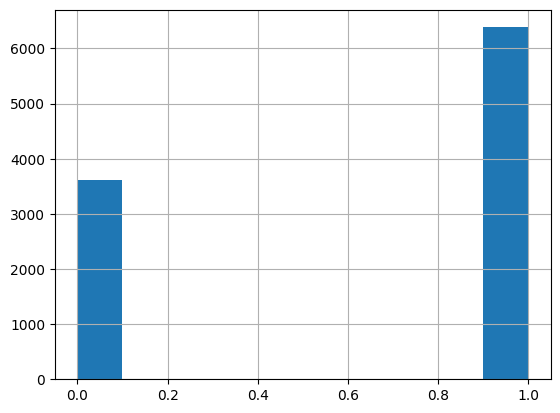

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# **Define** **Label** **and** **Features**

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
X= df.drop(['Surname','Churn'],axis=1)

In [ ]:
y= df['Churn']

In [ ]:
X.shape,y.shape

((10000, 11), (10000,))

# **Random Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(random_state=2529)


In [ ]:
X_rus,y_rus= rus.fit_resample(X,y)

In [ ]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

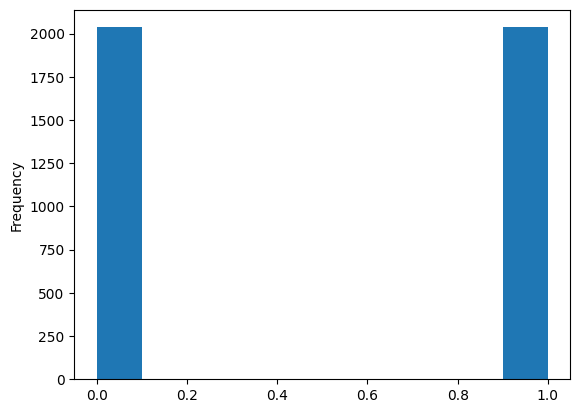

In [ ]:
y_rus.plot.hist()

#**Random Over Sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=2529)

In [ ]:
X_ros,y_ros= ros.fit_resample(X,y)

In [ ]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

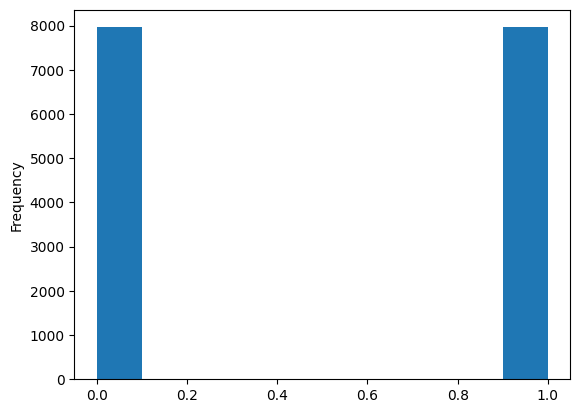

In [ ]:
y_ros.plot.hist()

# **Train Test** **Split**

**Splitting Original Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2529)

**Splitting Random Under Sample Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_rus_train,X_rus_test,y_rus_train,y_rus_test= train_test_split(X_rus,y_rus,test_size=0.3,random_state=2529)

**Splitting Random Over Sample Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_ros_train,X_ros_test,y_ros_train,y_ros_test= train_test_split(X_ros,y_ros,test_size=0.3,random_state=2529)

# **Standardize Feauters**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

**Standardize Original Data**

In [ ]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standardize Random Under Sample Data**

In [ ]:
X_rus_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(X_rus_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_rus_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(X_rus_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standardize Random Over Sample Data**

In [ ]:
X_ros_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(X_ros_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_ros_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(X_ros_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# **Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC
svc= SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred= svc.predict(X_test)

# **Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2381,   33],
       [ 436,  150]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



# **Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
para_grid= {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],
            'class_weight':['balanced']}


In [ ]:
grid= GridSearchCV(SVC(),para_grid,refit=True,verbose=2, cv = 2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions= grid.predict(X_test)

In [ ]:
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



# **Model with Random Over Sampling**

In [ ]:
svc_ros = SVC()

In [ ]:
svc_ros.fit(X_ros_train,y_ros_train)

SVC()

In [ ]:
y_pred_ros= svc_ros.predict(X_ros_test)

**Model Accuracy**

In [ ]:
confusion_matrix(y_ros_test,y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [ ]:
print(classification_report(y_ros_test,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



**Hyperparameter Tunning**

In [ ]:
param_grid= {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],
            'class_weight':['balanced']}

In [ ]:
grid_ros= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_ros_train,y_ros_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros= grid_ros.predict(X_ros_test)

In [ ]:
confusion_matrix(y_ros_test,grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [ ]:
print(classification_report(y_ros_test,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



# **Model with Random Under Sampling**

In [ ]:
svc_rus= SVC()

In [ ]:
svc_rus.fit(X_rus_train,y_rus_train)

SVC()

In [ ]:
y_pred_rus= svc_rus.predict(X_rus_test)

**Model Accuracy**

In [ ]:
confusion_matrix(y_rus_test,y_pred_rus)

array([[470, 157],
       [174, 422]])

In [ ]:
print(classification_report(y_rus_test,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



**Hyperparameter Tunning**

In [ ]:
param_grid= {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],
            'class_weight':['balanced']}

In [ ]:
grid_rus= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_rus_train,y_rus_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions_rus= grid_rus.predict(X_rus_test)

In [ ]:
confusion_matrix(y_rus_test,grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [ ]:
print(classification_report(y_rus_test,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# **Summary**

**Lets Compare**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [ ]:
print(classification_report(y_rus_test,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [ ]:
print(classification_report(y_rus_test,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [ ]:
print(classification_report(y_ros_test,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [ ]:
print(classification_report(y_ros_test,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778

